# Proyecto aprendizaje no supervisado

- Modelación del aprendizaje con inteligencia artificial
- TC2034.200
- Profesora: Dra. Lorena B. Martínez Elizalde

| Nombre                         | Matrícula |
| ------------------------------ | --------- |
| Juan Pablo Echeagaray González | A00830646 |
| Emily Rebeca Méndez Cruz       | A00830768 |
| Grace Aviance Silva Aróstegui  | A01285158 |

Fecha: 5 de mayo del 2022


## Dependencias básicas

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


## Lectura de datos

Hay que recalcar que los datos que leemos a continuación son los datos generados del proceso de limpieza del cuaderno `eda.ipynb`. En este archivo todavía no se ha lidiado con el desbalance de las clases. Creemos que no deberíamos de tratar esta problemática, después de todo, estamos trabajando con modelos de aprendizaje no supervisados, no deberíamos de saber cuántas clases hay en realidad.

In [23]:
df = pd.read_csv('../data/clean_data.csv')


In [24]:
df.Cancer.value_counts()


0    756
1     41
3     33
2     22
4      6
Name: Cancer, dtype: int64

In [25]:
X = df.drop('Cancer', axis=1)
X.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1
4,46,3.0,21.0,4.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0


In [26]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


## K-Means

In [27]:
def kmeans():
    from sklearn.cluster import KMeans
    from kneed import KneeLocator
    # Normalización
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X)

    # Estandarización
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(X)

    scaled_features[:5]

    # Instanciamos Kmeans class
    kmeans = KMeans(
        init="random",
        n_clusters=5,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    kmeans.fit(scaled_features)

    # The lowest SSE value
    kmeans.inertia_

    # Final locations of the centroid
    kmeans.cluster_centers_

    # The number of iterations required to converge
    kmeans.n_iter_

    # The cluster assignments are stored in the follow array
    kmeans.labels_[:5]

    # CHOOSING THE APPROPRIATE NUMBER OF CLUSTERS
    # 1. The elbow method
    # 2. The silhouette coefficient

    # 1. The elbow method
    # To perform the elbow method, run several k-means, increment k with each iteration, and record the SSE:
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    # A list holds the SSE values for each k
    sse = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

    plt.plot(range(1, 11), sse)
    plt.xticks(range(1, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("SSE")
    plt.show()

    # Para facilitar la visualización, para conocer el elbow point hacemos lo siguiente:
    kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing"
    )

    kl.elbow

    # 2. The silhouette coefficient

    # A list holds the silhouette coefficients for each k
    silhouette_coefficients = []

    # Notice you start at 2 clusters for silhouette coefficient
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        score = silhouette_score(scaled_features, kmeans.labels_)
        silhouette_coefficients.append(score)

    # Plotting the average silhouette scores for each k shows 
    # that the best choice for k is 3 since it has the maximum score:
    plt.plot(range(2, 11), silhouette_coefficients)
    plt.xticks(range(2, 11))
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Coefficient")
    plt.show()


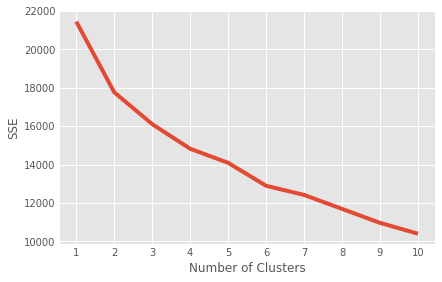

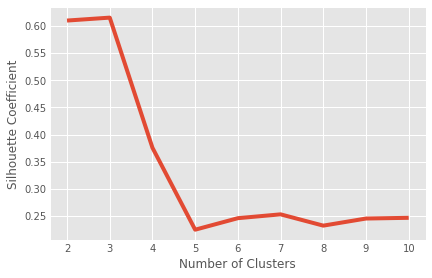

In [28]:
kmeans()

## Dendrograma

In [29]:
def dendrogram():
    pass

## Spectral Clustering

In [30]:
def spectral():
    pass

## DBSCAN

In [31]:
def dbscan():
    pass